# Setting Up - Install Packages in the Workspace
Before you move on to the project instruction, follow the cells below to ensure you have the necessary packages installed. 
The cells below will also educate you on installing newer pinned packages, should you need them in the future. 

In [1]:
# Step 1. Update the PATH env var. 
#This cell imports the library "os" that allows interaction with the operation system.
import os  
# After the import, the PATH library is updated with the local whete python and its dependencies are installed in this project
os.environ['PATH'] = f"{os.environ['PATH']}:/home/student/.local/bin"
os.environ['PATH'] = f"{os.environ['PATH']}:/opt/conda/lib/python3.10/site-packages"
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

In [2]:
# Check the version of any specific package
#Checking the version of the numpy library
!python -m pip freeze | grep numpy

numpy @ file:///work/mkl/numpy_and_numpy_base_1682953417311/work


# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [3]:
#Installig packages necessary to complete this project as unityagents
!pip -q install .

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [18]:
# Restart the Kernel. 
# If you skip this step, your notebook may not be able to import the packages well. 


In [1]:
#Import the Unity package and create a Banana environment
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

Found path: /data/Banana_Linux_NoVis/Banana.x86_64
Mono path[0] = '/data/Banana_Linux_NoVis/Banana_Data/Managed'
Mono config path = '/data/Banana_Linux_NoVis/Banana_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	libgrpc_csharp_ext.x86.so
PlayerPrefs - Creating folder: /home/student/.config/unity3d/Unity Technologies
PlayerPrefs - Creating folder: /home/student/.config/unity3d/Unity Technologies/Unity Environment
Logging to /home/student/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain (the only one available in this environment)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents)) #1

# number of actions
action_size = brain.vector_action_space_size 
print('Number of actions:', action_size) #4 Move forward, move backwars, turn left, turn right

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state) # A matrix with agent's velocity, along with ray-based perception of objects around the agent's forward direction.
state_size = len(state) 
print('States have length:', state_size)  #37 

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [4]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score

#While the episode is not "done", the agent will take a random action, collect rewards and update its state.
while True:
    
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                 # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [5]:
#env.close()
#This line is comented is order to not close the environment before the new implementation below.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [6]:
#Import Packages

In [7]:
import torch #imports the deep learning library
import torch.nn.functional as F #torch.nn.functional constains the activation functions for the neural networks
import torch.nn as nn #with torch.nn is possible to build the neural network with the desired architecture.
import torch.optim as optim #torch.optim contains the optmization algorithm to perform gradient descent as Adam or Stochastic Gradient Descent. 
import random #package for random number generation or random sampling.
from collections import namedtuple, deque #imports the namedtuple and deque structures, that will be useful in this project.
#n_device = torch.cuda.current_device() #Verify the type of device the project os running, as cuda or gpu.
#torch.cuda.get_device_name(n_device) #Print the device. It must be a gpu for the project run faster.


In [8]:
seed = 42 #Defining a seed variable, that will be used in the random sampling.

In [9]:
#Defining the Neural Network:
# It consistis of 4 layers:
# Input layer: state_size (37 neurons)
# First Hidden Layer: 256 neurons
# Second Hidden Layer: 128 neurons
# Output Layer: action_size (4)

#Some combinations of number of layers and number of neurons in each layer were tested, and this configuration worked well. 
# As we are getting the state as a input (and not the image of the game), it will be a fully connected neural network (with Linear comnnections). 
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size, seed, fc1_units = 128, fc2_units = 128):
        super(QNetwork, self).__init__() #getting the atributes of the super class nn.Module.
        self.seed = torch.manual_seed(seed) #Selecting the random seed as 42
        self.fc1 = nn.Linear(state_size, fc1_units) #Linear conection between the input and the first hidden layer.
        self.fc2 = nn.Linear(fc1_units, fc2_units) #Linear conection between the first hidden layer and the second one.
        self.fc3 = nn.Linear(fc2_units, action_size) #Linear conection between the second hidden layer and the output.

    
    #Defining the forward process of this neural network.
    #The chosen activation function for all the layers (except the last one) was the ReLu.
    #ReLu is a activation function that returns the value passed if it is greater than zero, and zero otherwise.
    def forward(self, state):
        x = F.relu(self.fc1(state)) 
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [10]:
BUFFER_SIZE = int(1e5)  # Size of the Replay Buffer that de Deep Q Network (DQN) will learn
BATCH_SIZE = 64         # Batch size that will be sampled from the Replay Buffer for the DQN training.
GAMMA = 0.9            # Time discount factor, so the model will prioritize short term gains without ignoring long term ones.
TAU = 1e-3             # Soft update of target parameters
LR = 5e-4               # learning rate of the optimization algorithm
UPDATE_EVERY = 16        # how often to update the local network

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #verifies if the project is running is running in a gpu (cuda) 

In [12]:
# Instantiate the Agent class, defining the interaction with the environment and how it will learn.
class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, state_size, action_size, seed):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            seed (int): random seed
        """
        self.state_size = state_size  #37
        self.action_size = action_size #4
        self.seed = random.seed(seed) #42

        # Q-Network
        #Instatiate the local and the target networks, with the same architecture, and pass them to the device (cgpu or cpu)
        self.qnetwork_local = QNetwork(state_size, action_size, seed).to(device)
        self.qnetwork_target = QNetwork(state_size, action_size, seed).to(device)
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=LR) #The optmization algorithm chosen was Adam
        loss_fn = torch.nn.MSELoss() #The loss function to compare the predicted values (resulted from the local network) and the real ones (target network) is the Mean Squared Error

        # Defines the memory of the agent as a ReplayBuyffer class (instatied below) 
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = 0
    
    def step(self, state, action, reward, next_state, done):
        # Save experience (state, action, reward, next_state, done) tuple in replay memory
        self.memory.add(state, action, reward, next_state, done)
        
        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > BATCH_SIZE:
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA) #the learn method is created below.

    def act(self, state, eps=0.):
        """Returns actions for given state as per current policy.
        
        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(device) #converts the state array to the torch tensor format
        self.qnetwork_local.eval() #Activates the evaluation mode of the neural network
        with torch.no_grad():  #Sets the neural network to not compute the gradients (for inference it is not necssary) 
            action_values = self.qnetwork_local(state) #Predicts the action values with the given state
        self.qnetwork_local.train() #Sets the neural network to the train mode again

        # Epsilon-greedy action selection.
        # If the random number is les than eps, a random action will be chosen, otherwise it will select the action with the max action_value
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Variable]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
            
            
        """
        
        # Unpack experiences
        states, actions, rewards, next_states, dones = experiences

        # Get the current Q values
        current_q_values = self.qnetwork_local(states).gather(1, actions)

        # Compute the target Q values
        with torch.no_grad():
            next_q_values = self.qnetwork_target(next_states).max(1)[0].unsqueeze(1)
            targets = rewards + (gamma * next_q_values * (1 - dones)) #Bellman Equation

        # Compute the loss
        loss = F.mse_loss(current_q_values, targets)

        # Optimize the model
        self.optimizer.zero_grad() #sets the gradients to zero, so the algorithm do not add them
        loss.backward() #Backpropagation
        self.optimizer.step() #Updates the optimizer

        # Update the target network
        self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU) #Soft update is instatiated below
    
        
                 
    #The update of the target network is done in this soft manner because it improves stability, reduce variability and improves convergence.
    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

#Instatiates the ReplayBuffer class, to manage the addition and removal of experiences from the experience deque.
class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.action_size = action_size #4
        self.memory = deque(maxlen=buffer_size) # Deque structure   
        self.batch_size = batch_size 
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"]) #Structure similar to a tuple, but each field gets a name
        self.seed = random.seed(seed)
    
    #Adding the experience tuple to the end of the deque
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    #Samples randomly batch_size samples from the deque, and converts to the torch tensor format.
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
  
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [13]:
#Initialize an agent.
agent = Agent(state_size = len(env_info.vector_observations[0]), action_size = brain.vector_action_space_size, seed = 42)

In [14]:
def dqn(n_episodes = 2000, max_t = 1000, eps_start = 1.0, eps_end = 0.01, eps_decay = 0.995):
    """Initialize the Deep Q Netqwork.

        Params
        ======
            n_episodes (int): number of episodes for training the neural network
            max_t (int): max number os sets in each episode if it is not done
            eps_start (float): start value of epslon
            eps_end (float): end value of epslon
            eps_decay (float): decayment rate of epslon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # deque has size 100
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1): 
        env_info = env.reset(train_mode=True)[brain_name] #reset the environment in the begginning of the episode
        state = env_info.vector_observations[0] #initial state
        score = 0 #reset score
        for t in range(max_t): #loop over steps until it is done or reached max_t
            action = agent.act(state, eps) #given the state, chooses the action
            env_info = env.step(action)[brain_name] #perform the action and receives new state, reward and done.
            next_state = env_info.vector_observations[0]  
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)  #saves experience tuple and updates the neural networks
            state = next_state #update steps
            score += reward #saves reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

#Initialize the dqn
scores = dqn()


Episode 100	Average Score: 0.47
Episode 200	Average Score: 3.19
Episode 300	Average Score: 6.11
Episode 400	Average Score: 8.57
Episode 500	Average Score: 9.97
Episode 600	Average Score: 11.19
Episode 700	Average Score: 12.36
Episode 737	Average Score: 13.01
Environment solved in 637 episodes!	Average Score: 13.01


INFO:matplotlib.font_manager:generated new fontManager


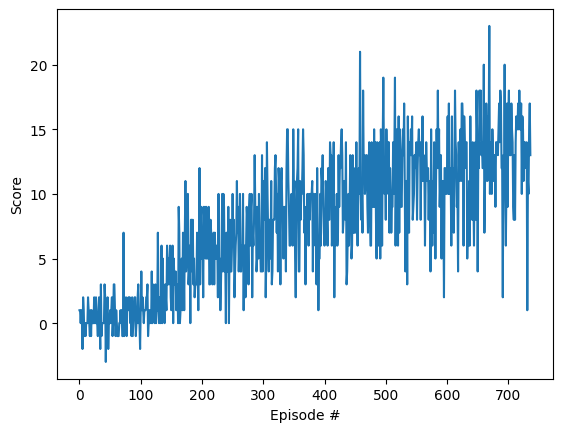

In [15]:
#Plotting the increasing in the scores 
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()